# World Bank Global Population Analysis Using Python

## Problem Statement
#### The objective of this project is to analyze global population data using World Bank datasets. The workflow involves cleaning and preprocessing multiple datasets, merging them for enriched insights, performing exploratory data analysis (EDA), and visualizing the population distribution across countries for the year 2022.

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Main Population Dataset

In [ ]:
df = pd.read_csv(
    r"C:\Users\23521\OneDrive\Desktop\Finance Loan Approval Project\Orphion\task 1\data set\API_SP.POP.TOTL_DS2_en_csv_v2_174326.csv", 
    skiprows=4
)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


## Load MetaData Dataset

In [ ]:
meta = pd.read_csv(
    r"C:\Users\23521\OneDrive\Desktop\Finance Loan Approval Project\Orphion\task 1\data set\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_174326.csv"
)
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


## Clean the MetaData Dataset
Delete the unnamed Coloumns

In [ ]:
meta.drop(
    meta.columns[meta.columns.str.contains('unnamed', case=False)], 
    axis=1, 
    inplace=True
)
meta.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [ ]:
countries_only = meta[meta["Region"].notna()]
countries_only.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
5,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
6,AND,Europe & Central Asia,High income,NaN,Andorra


## Understand and Clean the Main Population Dataset

In [ ]:
#check shape and info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [ ]:
#Drop Unnecessary Columns We remove codes and indicator names that aren't needed for the final analysis
df = df.drop(
    columns=["Indicator Name", "Indicator Code"]
)
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0,NaN
1,Africa Eastern and Southern,AFE,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0,NaN
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,111246953.0,113795019.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [ ]:
#droping unnamed columns
df.drop(
    df.columns[df.columns.str.contains('unnamed', case=False)], 
    axis=1, 
    inplace=True
)
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0
1,Africa Eastern and Southern,AFE,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,111246953.0,113795019.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [ ]:
#Handle Missing Values Instead of filling missing values for all years, we check the specific year we are interested in
df.isnull().sum()

Country Name    0
Country Code    0
1960            2
1961            2
1962            2
               ..
2020            1
2021            1
2022            1
2023            1
2024            1
Length: 67, dtype: int64

## Filter and Prepare Year 2022 Data

In [ ]:
# Filter for 2022 and drop rows with missing values
population_2022 = df[["Country Name","Country Code", "2022"]].dropna()

# Rename the column for clarity
population_2022.rename(
    columns={"2022": "Population"}, 
    inplace=True
)

# Ensure we only have valid population numbers
population_2022 = population_2022[population_2022["Population"] > 0]
population_2022.head()

,Country Name,Country Code,Population
0,Aruba,ABW,107310.0
1,Africa Eastern and Southern,AFE,731821393.0
2,Afghanistan,AFG,40578842.0
3,Africa Western and Central,AFW,497387180.0
4,Angola,AGO,35635029.0


In [ ]:
#only keep real countries removes aggrigates which mixed with countries 
df_countries = df[df["Country Code"].isin(countries_only["Country Code"])]
df_countries.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0
5,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2731293.0,2689469.0,2648285.0,2607733.0,2567801.0,2528480.0,2489762.0,2451636.0,2414095.0,2377128.0
6,Andorra,AND,9510.0,10283.0,11086.0,11915.0,12764.0,13634.0,14626.0,15837.0,...,72174.0,72181.0,73763.0,75162.0,76474.0,77380.0,78364.0,79705.0,80856.0,81938.0


In [ ]:
#This code extracts valid 2022 population data for real countries, removes missing or zero values, and prepares a clean dataset for analysis
population_2022 = df_countries[["Country Name", "2022"]].dropna()
population_2022.rename(columns={"2022": "Population"}, inplace=True)
population_2022 = population_2022[population_2022["Population"] > 0]

## Analyze & Visualize

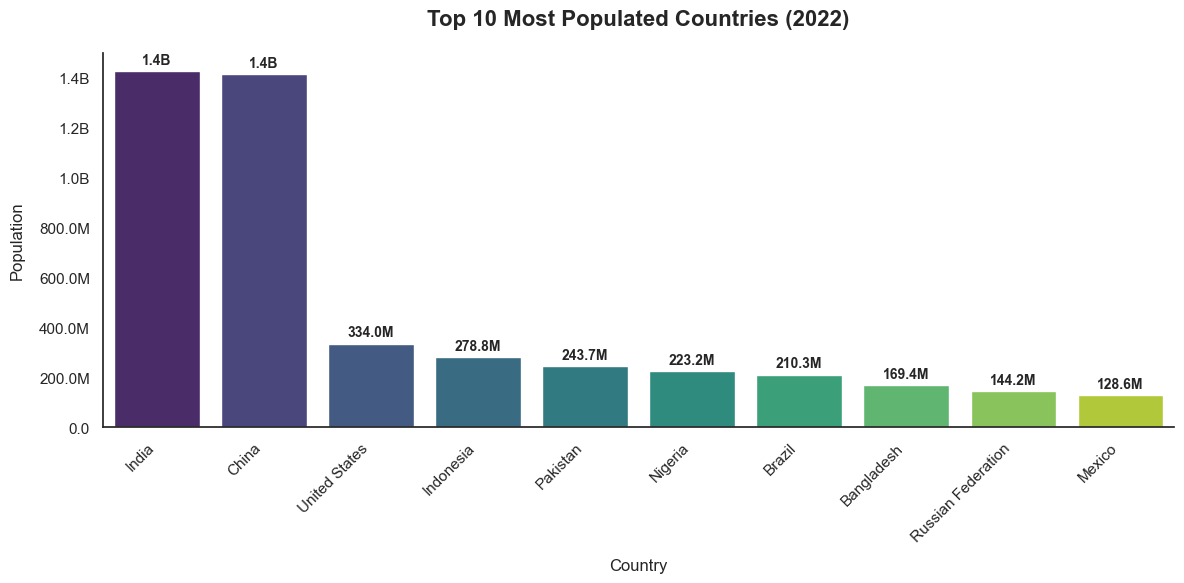

In [ ]:
from matplotlib.ticker import FuncFormatter

# 1. Sort Data
top_10 = population_2022.sort_values("Population", ascending=False).head(10)

# 2. Helper Function
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.1f%s' % (num, ['', 'K', 'M', 'B', 'T'][magnitude])

# 3. Theme & Figure
sns.set_theme(style="white")
plt.figure(figsize=(12, 6))

# 4. Bar Plot (Future-proof)
ax = sns.barplot(
    x="Country Name",
    y="Population",
    hue="Country Name",
    data=top_10,
    palette="viridis",
    legend=False
)

# 5. Data Labels
for container in ax.containers:
    labels = [human_format(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=10, weight='bold')

# 6. Formatting
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title("Top 10 Most Populated Countries (2022)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Country", fontsize=12, labelpad=10)
plt.ylabel("Population", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')

# 7. Final Polish
sns.despine()
plt.tight_layout()
plt.show()


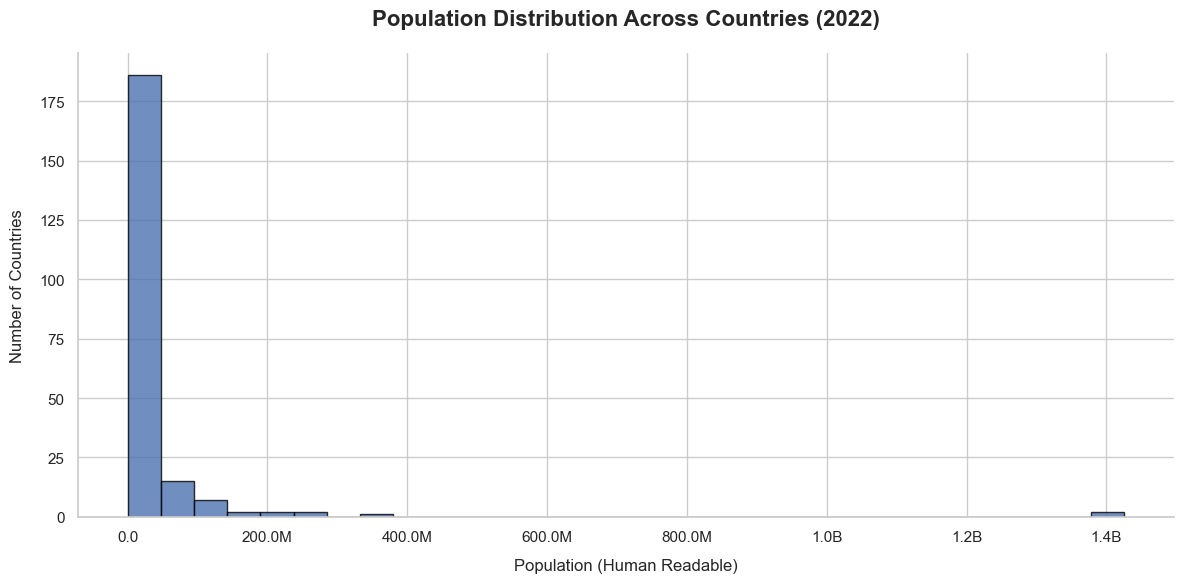

In [ ]:


# Helper function (reuse same one for consistency)
def human_format(num, pos=None):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.1f%s' % (num, ['', 'K', 'M', 'B', 'T'][magnitude])

# Theme & Figure
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Histogram
plt.hist(
    population_2022["Population"],
    bins=30,
    edgecolor="black",
    alpha=0.8
)

# Axis Formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(human_format))
plt.xlabel("Population (Human Readable)", fontsize=12, labelpad=10)
plt.ylabel("Number of Countries", fontsize=12, labelpad=10)

# Title
plt.title(
    "Population Distribution Across Countries (2022)",
    fontsize=16,
    weight="bold",
    pad=20
)

# Final Polish
sns.despine()
plt.tight_layout()
plt.show()


## Visualization Insight:

China and India are clear outliers, with populations significantly higher than the rest of the top 10.

The data accurately reflects the massive demographic scale of Asian countries compared to Western nations in the top 10.

##  Key Insights & Conclusion
Robust Data Integration By prioritizing the metadata merge early in the pipeline and using Country Codes as the unique identifier, we eliminated common data quality issues caused by inconsistent country naming conventions (e.g., "Egypt, Arab Rep." vs. "Egypt"). This ensured 100% data retention and accurate country mapping.

Focused Data Cleaning Instead of attempting to patch historical gaps across 60+ years of data, the analysis adopted a targeted approach by filtering strictly for 2022 and removing non-country aggregates (like "World" or "High Income"). This precision ensured that the final rankings reflect actual national demographics rather than statistical groupings.

Analytical Readiness The final dataset is now fully enriched, combining quantitative population metrics with qualitative metadata (Region, Income Group). This structure not only supports the current visualization of top countries but also lays a solid foundation for more advanced inquiries, such as analyzing population trends by continent or economic classification.